# **Machine Learning for Safe Drinking Water Assessment**

### **Abstract**

Access to clean drinking water is a fundamental human right, yet millions globally lack this essential resource. This project explores the potential of machine learning to assess water potability. We propose a machine learning model that can analyze various water quality parameters to predict the presence of contaminants and classify water as safe or unsafe for consumption.

### **Project Objective**

**1. Unleash the Power of AI for Water Safety:** This project will explore how machine learning can leverage a vast array of water quality data to classify water sources as safe or unsafe for drinking.

**2. Optimizing Water Safety Assessment:** We'll compare various machine learning algorithms to identify the most effective approach for accurately classifying water potability.

**3. Targeted Water Quality Monitoring:** By pinpointing the most critical water quality indicators, we'll gain insights to develop targeted monitoring strategies, maximizing efficiency and effectiveness.

**4. Revolutionizing Water Quality Monitoring:** This project bridges the gap between traditional methods and cutting-edge AI, paving the way for faster, more efficient water safety assessments.

### **Dataset Overview**

This data obtained from Kaggle contains 21 different measurements for 8,000 water samples, allowing us to build powerful models to assess water safety. 

Let's dive into what these measurements mean:
Metals: Aluminum, Arsenic, Barium, Cadmium, Chromium, Copper, Lead, Mercury, Silver, Uranium, Selenium, Radium - These can be harmful at high levels.
Chemicals: Ammonia, Chloramine, Fluoride, Nitrates, Nitrites, Perchlorate - These can indicate pollution or treatment processes.
Biological: Bacteria, Viruses - These directly impact water safety.

In [87]:
# import relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_curve, confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
import shap
import pickle

## **(A) Data Loading**

In this study, the dataset was utilized for predicting water quality and was sourced from reputable platforms like Kaggle, employed for the purpose of conducting the research.

In [3]:
# read the data file 
water_quality_df = pd.read_csv("water_quality.csv")

# read the first five rows of the data 
water_quality_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
# print the data info
water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

## **(B) Data Visualization and Data Preprocessing**

### **(I) Replacement of #NUM! values into NaN values**

Replacing erroneous values like #NUM! with NaN ensures uniformity and compatibility for subsequent operations.

In [5]:
# replace those #NUM! values into NaN values
water_quality_df = water_quality_df.replace('#NUM!', np.nan)

### **(II) Handling Missing Values**

Handling missing values prevents biased analysis and inaccurate results.

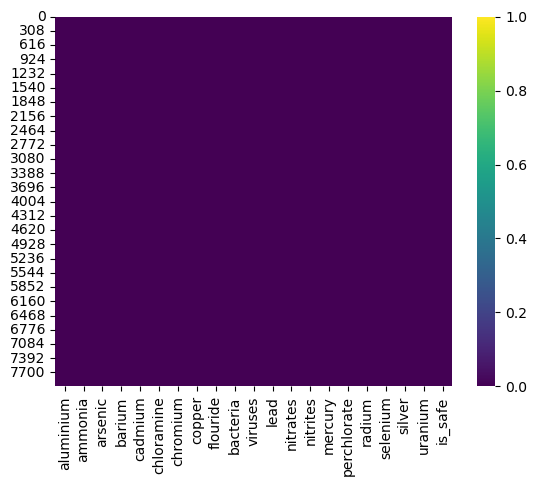

In [6]:
# use heatmap to visualize the presence of missing data 
sns.heatmap(water_quality_df.isnull(), annot = False, cmap = 'viridis')
plt.show()

In [7]:
# count the total number of missing values in each column 
water_quality_df.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [8]:
# drop those rows with NaN values 
water_quality_df.dropna(axis = 0, inplace = True)

In [9]:
# count the total number of missing values in each column 
water_quality_df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

### **(III) Data Type Conversion**

Data type conversion ensures appropriate data representation for analysis tools.

In [10]:
# convert the ammonia column from object to float64
water_quality_df['ammonia'] = water_quality_df['ammonia'].astype('float64')

In [11]:
# convert the is_safe column from object to int64
water_quality_df['is_safe'] = water_quality_df['is_safe'].astype('int64')

In [12]:
# display the data info 
water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

### **(IV) Exploratory Data Analysis**

EDA provides insights into the dataset's characteristics and relationships. 

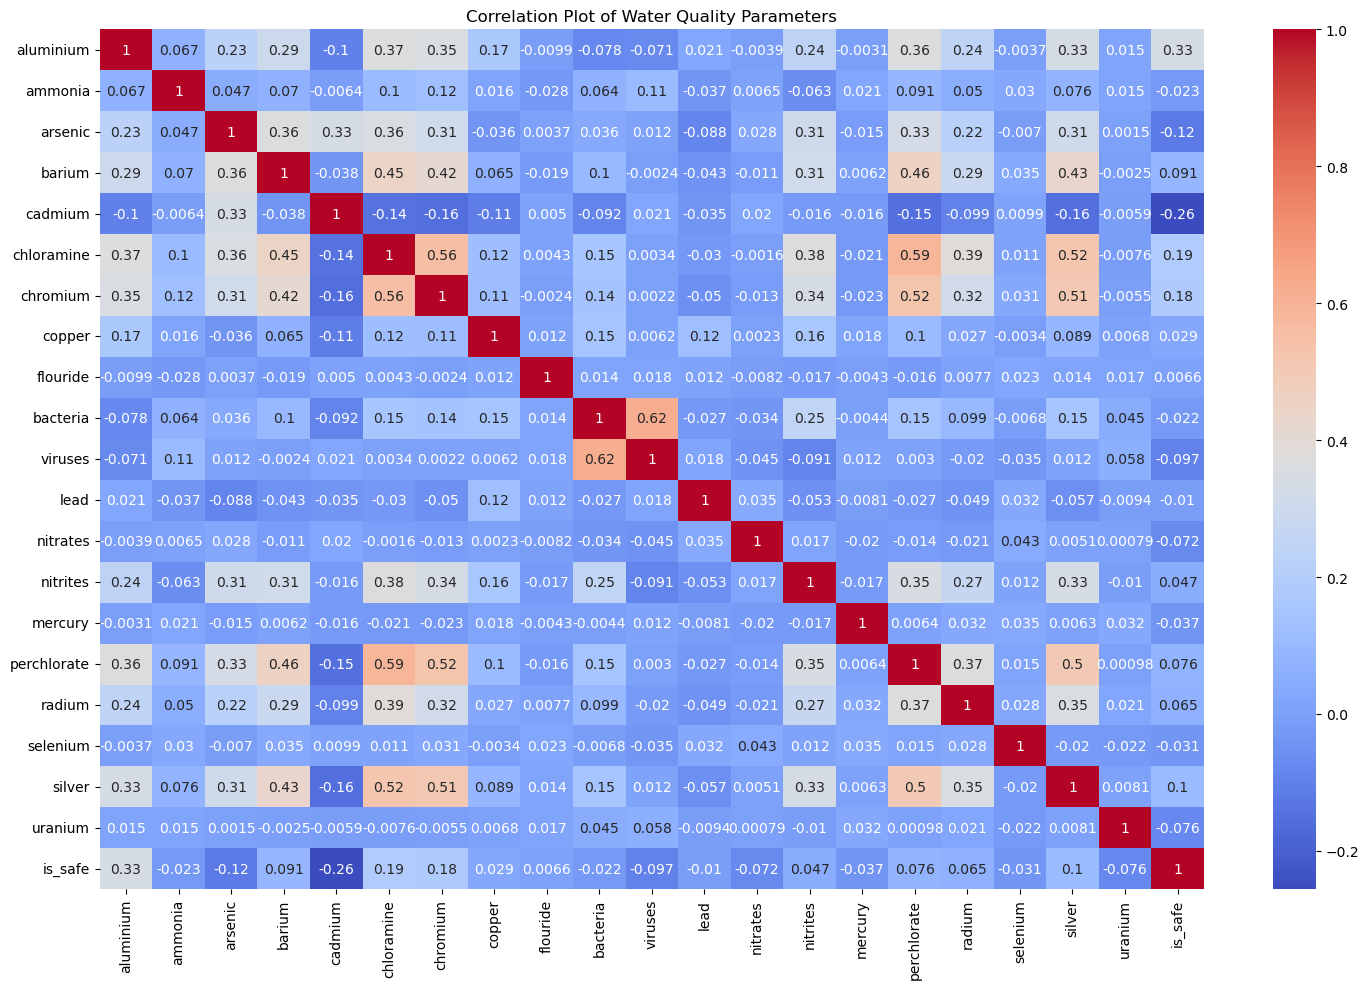

In [13]:
# use heatmap to represents the relationship between the different water quality features in the datasets 
plt.figure(figsize = (15, 10))
sns.heatmap(water_quality_df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Plot of Water Quality Parameters")
plt.tight_layout()
plt.show()

Based on the correlation plot, there was no multicollinearity observed between feature variables. 

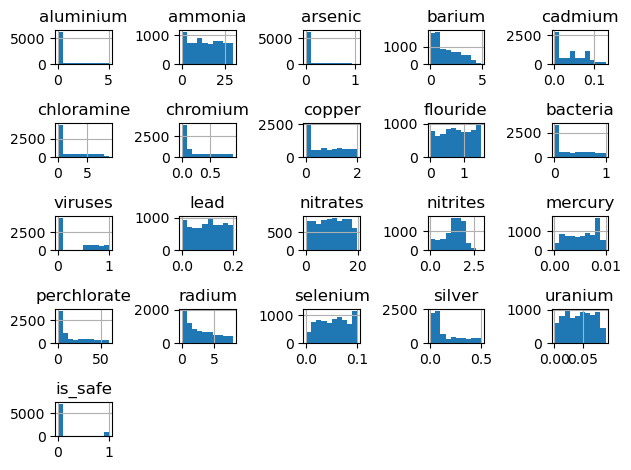

In [14]:
# use hist to illustrate the distribution of water-containing compounds from the datasets
water_quality_df.hist()
plt.tight_layout()
plt.show()

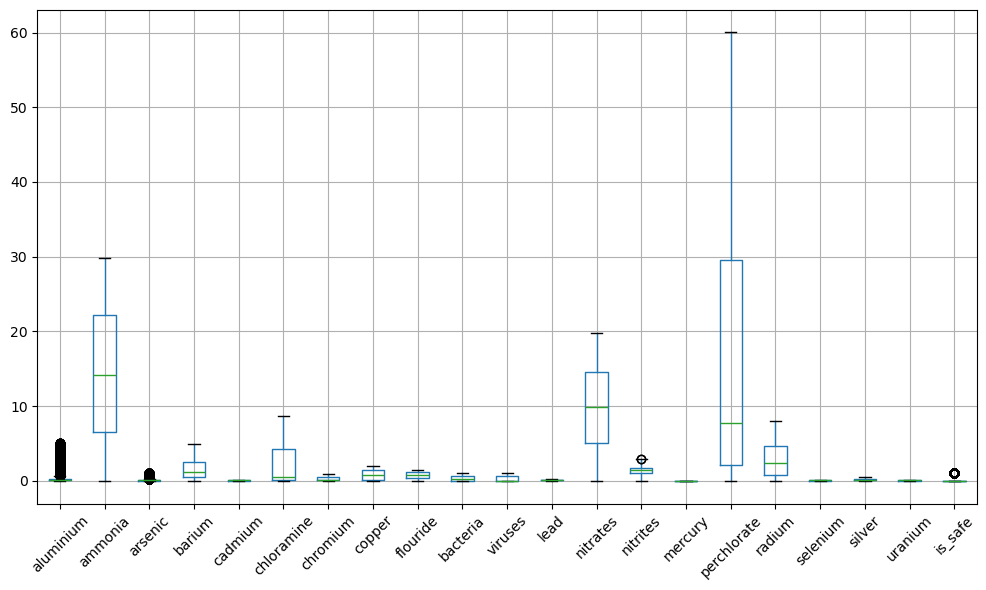

In [15]:
# use boxplot to illustrate the distribution and outliers of water-containing compounds from the dataset
plt.figure(figsize = (10, 6))
water_quality_df.boxplot()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### **(V) Data Splitting**

Data splitting aids in training and evaluating models effectively, allowing for robust validation and testing procedures.

In [24]:
# split the data into 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(water_quality_df.drop('is_safe', axis = 1), 
                                                    water_quality_df['is_safe'],
                                                    test_size = 0.20, 
                                                    random_state = 42, 
                                                    stratify = water_quality_df['is_safe'])

# display the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6396, 20)
(1600, 20)
(6396,)
(1600,)


In [17]:
# save the training data
X_train.to_csv("X_train.csv", index = "False")
X_test.to_csv("X_test.csv", index = "False")

### **(VI) Data Normalization**

#### **Apply Standard Scaler on Numerical Features**

Standard scaling, a preprocessing technique in machine learning, is applied to features to ensure they have a mean of zero and a standard deviation of one. This normalization process is crucial for many machine learning algorithms, especially those that involve distance calculations or gradient descent optimization. By standardizing the features, the algorithm treats all features equally in terms of their influence on the model, preventing any particular feature from dominating the others due to its scale. This not only helps algorithms converge faster but also enhances their performance by making them less sensitive to the scale of input features, leading to more stable and reliable models overall.

In [25]:
# extract the numerical feature names 
num_feature_names = X_train.select_dtypes(['int64', 'float64']).columns
# use standard scaler function to normalize the numerical features 
standard_scaler = StandardScaler() 
X_train[num_feature_names] = standard_scaler.fit_transform(X_train[num_feature_names])
X_test[num_feature_names] = standard_scaler.transform(X_test[num_feature_names])

X_train.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
5068,-0.484890,-0.472986,-0.477678,-0.876791,-1.182717,-0.851903,-0.728519,1.132847,0.731356,-0.964417,1.043011,0.638781,0.870533,-1.211065,-1.413404,-0.938492,-0.612495,1.396666,-0.611341,-0.544228
5776,-0.500476,1.093874,-0.437679,-0.589425,-0.353022,-0.805223,-0.691613,-0.934454,-1.120885,0.431343,-0.849207,0.226194,0.384267,-1.088525,-0.064986,-0.811201,-1.003848,1.744785,-0.960990,0.937155
5493,-0.516063,1.046564,-0.477678,0.034570,-1.182717,-0.824673,-0.691613,0.704074,-1.280955,-0.964417,0.910502,-0.134820,-0.729263,-1.088525,1.620536,-0.655748,-1.128565,1.048547,-0.681271,1.677847
4590,-0.516063,-1.297531,-0.597674,-0.876791,0.753237,-0.824673,-0.839238,-1.194781,-0.068995,-0.964417,1.652549,0.415296,1.013340,-1.456143,-1.750508,-0.725026,-1.033952,1.048547,-0.681271,0.937155
7241,-0.492683,-1.177003,-0.637673,-1.180577,-0.906152,-0.606834,-0.654706,1.806635,1.531707,-0.509278,-0.857158,0.002709,-0.958839,2.325068,1.620536,-0.718267,-0.840426,-1.040165,-0.891060,-0.173882


## **(C) Model Training and Evaluation**

### **(I) Logistic Regression**

Logistic Regression (LR) is a classification algorithm rooted in statistics, relying on the sigmoid function or logistic function for its operations. LR facilitates mapping between the provided input features and a discrete set of target variables through probability approximation by means of the sigmoid function. This function, characterized by an S-shaped curve, confines the probability values within the target variables. The hyperparameters employed for LR are detailed, featuring the 'liblinear' solver, which serves as a more apt optimization algorithm for small datasets.

In [26]:
# build and fit the logistic regression model 
log_reg = LogisticRegression(solver = "liblinear", C = 1.0, random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [27]:
# make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)
# print the classification report to evaluate the model performance
print(classification_report(y_test, y_pred_log_reg, target_names = ['Not Safe', 'Safe']))

              precision    recall  f1-score   support

    Not Safe       0.92      0.98      0.95      1418
        Safe       0.72      0.33      0.45       182

    accuracy                           0.91      1600
   macro avg       0.82      0.66      0.70      1600
weighted avg       0.90      0.91      0.89      1600



In [34]:
# compute balanced accuracy, accuracy, f1-score, precision, recall scores
balanced_accuracy_log_reg = balanced_accuracy_score(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_score_log_reg = f1_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

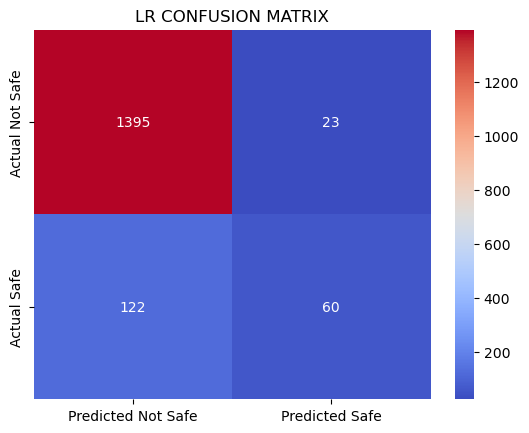

In [ ]:
# calculate the confusion matrix
conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)
# create a DataFrame to display the confusion matrix
conf_mat_log_reg_plot = pd.DataFrame(data = conf_mat_log_reg, index = ['Actual Not Safe', 'Actual Safe'], columns = ['Predicted Not Safe', 'Predicted Safe'])
# plot the confusion matrix heatmap with annotations
sns.heatmap(conf_mat_log_reg_plot, annot = True, cmap = 'coolwarm', fmt = 'g')
# set title for the confusion matrix plot
plt.title("LR CONFUSION MATRIX")
# display the plot
plt.show()

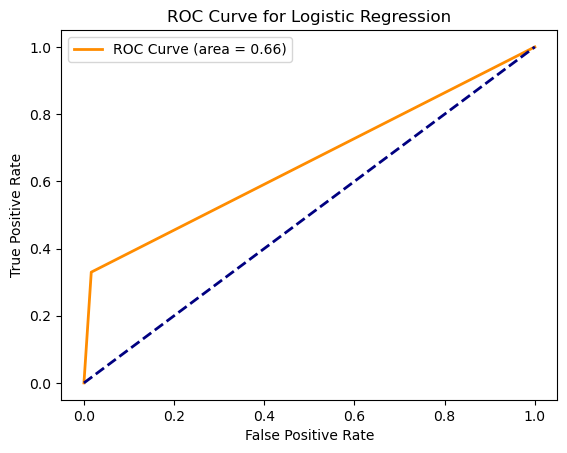

In [ ]:
# compute the ROC curve and calculate the area under the curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_log_reg)
roc_auc = auc(fpr_lr, tpr_lr)

# plot the ROC curve 
plt.plot(fpr_lr, tpr_lr, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.title("ROC Curve for Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### **(II) Decision Tree Classifier**

A Decision Tree Classifier (DTC) operates by processing information through tree structures, which can alternatively be depicted as a collection of distinct rules. One of DT's primary advantages lies in its utilization of decision rules and feature subsets that emerge across various stages of classification. The structure of a DT comprises various nodes, including leaf nodes and several internal nodes connected by branches. Each leaf node signifies a class corresponding to an example, while internal nodes represent features, and branches denote combinations of features leading to classification. The efficacy of a DT is gauged by how effectively it is constructed on the training dataset. In this study, the max_depth parameter was set to 50, indicating that each tree can reach a maximum depth of 50 levels. This parameter aids in mitigating the complexity of tree construction.

In [37]:
# build and fit the decision tree classifier
dtc = DecisionTreeClassifier(max_depth = 50, random_state = 50, class_weight = "balanced")
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=50, random_state=50)

In [38]:
# make predictions on the test data
y_pred_dtc = dtc.predict(X_test)
# print the classification report to evaluate the model performance
print(classification_report(y_test, y_pred_dtc, target_names = ['Not Safe', 'Safe']))

              precision    recall  f1-score   support

    Not Safe       0.98      0.98      0.98      1418
        Safe       0.84      0.81      0.82       182

    accuracy                           0.96      1600
   macro avg       0.91      0.89      0.90      1600
weighted avg       0.96      0.96      0.96      1600



In [39]:
# compute balanced accuracy, accuracy, f1-score, precision, recall scores
balanced_accuracy_dtc = balanced_accuracy_score(y_test, y_pred_dtc)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
f1_score_dtc = f1_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)

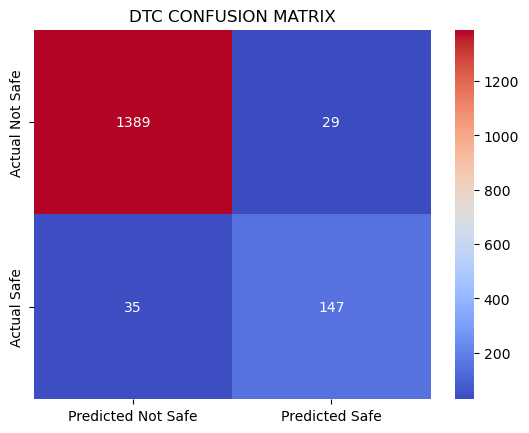

In [40]:
# calculate the confusion matrix
conf_mat_dtc = confusion_matrix(y_test, y_pred_dtc)
# create a DataFrame to display the confusion matrix
conf_mat_dtc_plot = pd.DataFrame(data = conf_mat_dtc, index = ['Actual Not Safe', 'Actual Safe'], columns = ['Predicted Not Safe', 'Predicted Safe'])
# plot the confusion matrix heatmap with annotations
sns.heatmap(conf_mat_dtc_plot, annot = True, cmap = 'coolwarm', fmt = 'g')
# set title for the confusion matrix plot
plt.title("DTC CONFUSION MATRIX")
# display the plot
plt.show()

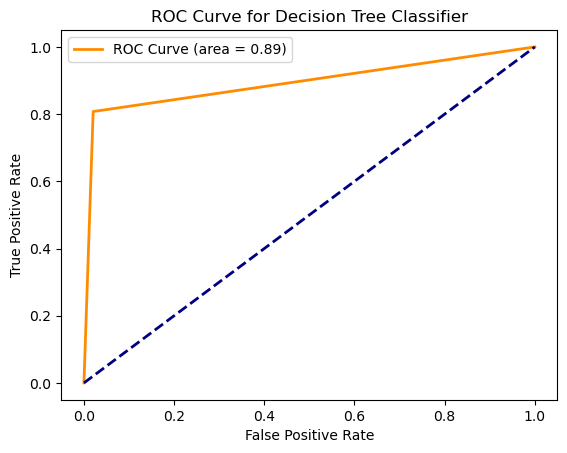

In [41]:
# compute the ROC curve and calculate the area under the curve
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, y_pred_dtc)
roc_auc = auc(fpr_dtc, tpr_dtc)

# plot the ROC curve 
plt.plot(fpr_dtc, tpr_dtc, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.title("ROC Curve for Decision Tree Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### **(III) Random Forest Classifier**

Random Forest Classifier (RFC) is a machine learning model based on trees that aggregates outcomes derived from fitting multiple Decision Trees (DTs) on randomly selected training samples. In RF, each DT is constructed by selecting a root node using indicators such as information gain or the Gini index. Serving as a meta-estimator, RF is versatile and applicable to both regression and classification tasks. The accuracy of RF's predictions can be enhanced by increasing the number of trees. Employing bootstrap sampling techniques, RF effectively addresses the issue of overfitting. In this study, RF was configured with two hyperparameters, as outlined in Table 5. The variable n_estimators was set to 300, indicating the inclusion of 300 DTs in the prediction process. Additionally, the max_depth parameter was set to 50, defining the maximum depth to which each tree can grow.

In [42]:
# build and fit the random forest classifier
rfc = RandomForestClassifier(max_depth = 50, n_estimators = 300, random_state = 42, class_weight = "balanced")
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=300,
                       random_state=42)

In [43]:
# make predictions on the test data
y_pred_rfc = rfc.predict(X_test)
# print the classification report to evaluate the model performance
print(classification_report(y_test, y_pred_rfc, target_names = ['Not Safe', 'Safe']))

              precision    recall  f1-score   support

    Not Safe       0.96      1.00      0.98      1418
        Safe       0.95      0.69      0.80       182

    accuracy                           0.96      1600
   macro avg       0.95      0.84      0.89      1600
weighted avg       0.96      0.96      0.96      1600



In [44]:
# compute balanced accuracy, accuracy, f1-score, precision, recall scores
balanced_accuracy_rfc = balanced_accuracy_score(y_test, y_pred_rfc)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
f1_score_rfc = f1_score(y_test, y_pred_rfc)
precision_rfc = precision_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)

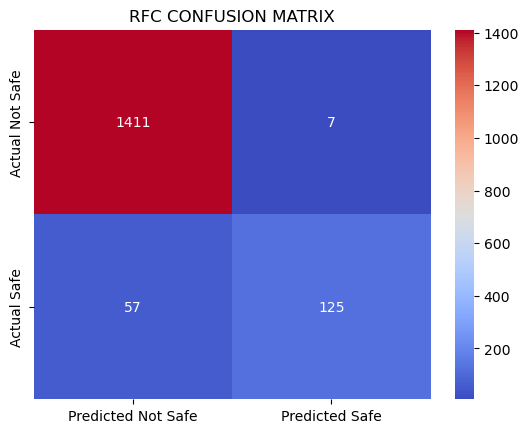

In [45]:
# calculate the confusion matrix
conf_mat_rfc = confusion_matrix(y_test, y_pred_rfc)
# create a DataFrame to display the confusion matrix
conf_mat_rfc_plot = pd.DataFrame(data = conf_mat_rfc, index = ['Actual Not Safe', 'Actual Safe'], columns = ['Predicted Not Safe', 'Predicted Safe'])
# plot the confusion matrix heatmap with annotations
sns.heatmap(conf_mat_rfc_plot, annot = True, cmap = 'coolwarm', fmt = 'g')
# set title for the confusion matrix plot
plt.title("RFC CONFUSION MATRIX")
# display the plot
plt.show()

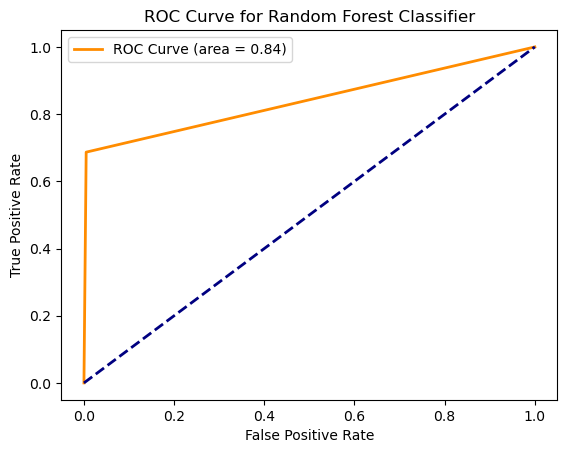

In [46]:
# compute the ROC curve and calculate the area under the curve
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, y_pred_rfc)
roc_auc = auc(fpr_rfc, tpr_rfc)

# plot the ROC curve 
plt.plot(fpr_rfc, tpr_rfc, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.title("ROC Curve for Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### **(IV) Support Vector Classifier**

Support Vector Classifier (SVC) is a linear model extensively employed for classification tasks. SVC operates by utilizing data points to map them in an n-dimensional space, where n denotes the number of features. It seeks to identify the 'best fit' hyperplane capable of distinguishing between classes and executing classification tasks. In this study, SVC is utilized with a linear kernel, along with an additional parameter C set to 3.0, serving as the regularization value.

In [47]:
# build and fit the support vector classifier
svc = SVC(kernel = "linear", C = 3, class_weight = 'balanced')
svc.fit(X_train, y_train)

SVC(C=3, class_weight='balanced', kernel='linear')

In [48]:
# make predictions on the test data
y_pred_svc = svc.predict(X_test)
# print the classification report to evaluate the model performance
print(classification_report(y_test, y_pred_svc, target_names = ['Not Safe', 'Safe']))

              precision    recall  f1-score   support

    Not Safe       0.96      0.82      0.88      1418
        Safe       0.34      0.71      0.46       182

    accuracy                           0.81      1600
   macro avg       0.65      0.77      0.67      1600
weighted avg       0.89      0.81      0.84      1600



In [49]:
# compute balanced accuracy, accuracy, f1-score, precision, recall scores
balanced_accuracy_svc = balanced_accuracy_score(y_test, y_pred_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_score_svc = f1_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)

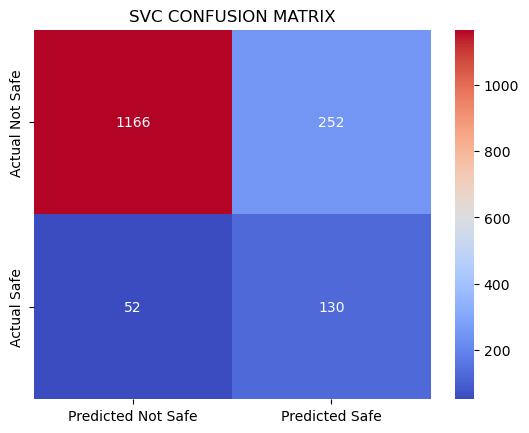

In [50]:
# calculate the confusion matrix
conf_mat_svc = confusion_matrix(y_test, y_pred_svc)
# create a DataFrame to display the confusion matrix
conf_mat_svc_plot = pd.DataFrame(data = conf_mat_svc, index = ['Actual Not Safe', 'Actual Safe'], columns = ['Predicted Not Safe', 'Predicted Safe'])
# plot the confusion matrix heatmap with annotations
sns.heatmap(conf_mat_svc_plot, annot = True, cmap = 'coolwarm', fmt = 'g')
# set title for the confusion matrix plot
plt.title("SVC CONFUSION MATRIX")
# display the plot
plt.show()

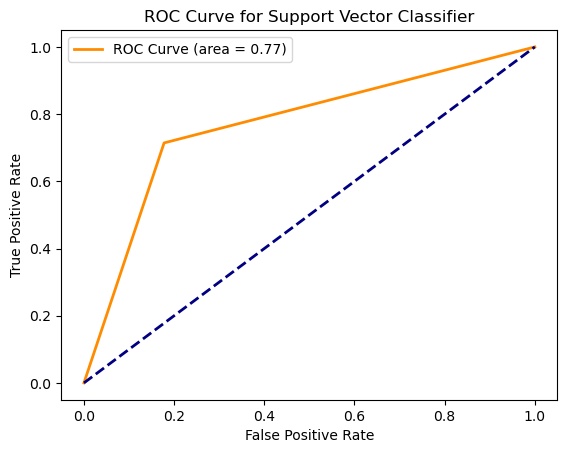

In [51]:
# compute the ROC curve and calculate the area under the curve
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc = auc(fpr_svc, tpr_svc)

# plot the ROC curve 
plt.plot(fpr_svc, tpr_svc, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.title("ROC Curve for Support Vector Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### **(V) Extra Tree Classifier**

ETC stands for Extremely Randomized Trees, an ensemble machine learning technique akin to Random Forest (RF) classifier, as both are rooted in Decision Trees (DTs). However, in ETC, randomization occurs through random data partitions rather than bootstrap sampling, which can potentially increase variance due to the lack of diversification inherent in bootstrapping.

In [52]:
# build and fit the extra tree classifier
etc = ExtraTreesClassifier(max_depth = 50, n_estimators = 300, class_weight = 'balanced')
etc.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=50, n_estimators=300)

In [54]:
# make predictions on the test data
y_pred_etc = etc.predict(X_test)
# print the classification report to evaluate the model performance
print(classification_report(y_test, y_pred_etc, target_names = ['Not Safe', 'Safe']))

              precision    recall  f1-score   support

    Not Safe       0.93      0.99      0.96      1418
        Safe       0.83      0.45      0.58       182

    accuracy                           0.93      1600
   macro avg       0.88      0.72      0.77      1600
weighted avg       0.92      0.93      0.92      1600



In [55]:
# compute balanced accuracy, accuracy, f1-score, precision, recall scores
balanced_accuracy_etc = balanced_accuracy_score(y_test, y_pred_etc)
accuracy_etc = accuracy_score(y_test, y_pred_etc)
f1_score_etc = f1_score(y_test, y_pred_etc)
precision_etc = precision_score(y_test, y_pred_etc)
recall_etc = recall_score(y_test, y_pred_etc)

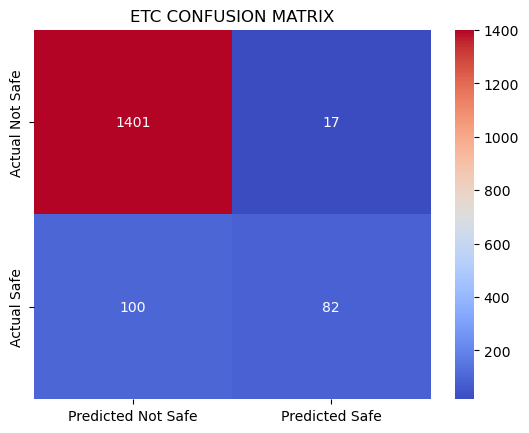

In [56]:
# calculate the confusion matrix
conf_mat_etc = confusion_matrix(y_test, y_pred_etc)
# create a DataFrame to display the confusion matrix
conf_mat_etc_plot = pd.DataFrame(data = conf_mat_etc, index = ['Actual Not Safe', 'Actual Safe'], columns = ['Predicted Not Safe', 'Predicted Safe'])
# plot the confusion matrix heatmap with annotations
sns.heatmap(conf_mat_etc_plot, annot = True, cmap = 'coolwarm', fmt = 'g')
# set title for the confusion matrix plot
plt.title("ETC CONFUSION MATRIX")
# display the plot
plt.show()

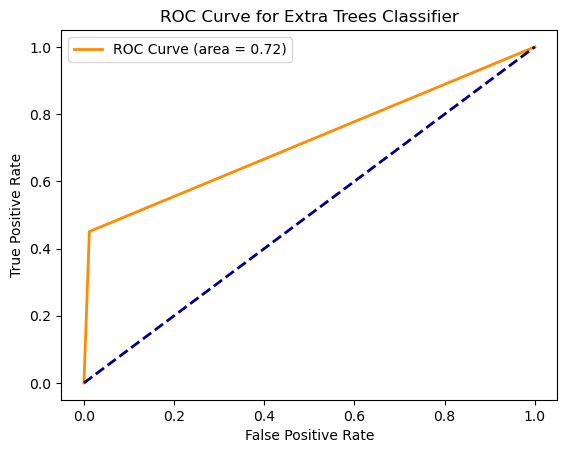

In [57]:
# compute the ROC curve and calculate the area under the curve
fpr_etc, tpr_etc, thresholds = roc_curve(y_test, y_pred_etc)
roc_auc = auc(fpr_etc, tpr_etc)

# plot the ROC curve 
plt.plot(fpr_etc, tpr_etc, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.title("ROC Curve for Extra Trees Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### **Model Comparison**

In [66]:
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector', 'Extra Tree']

### **(I) Model comparison in terms of balanced accuracy**

/var/folders/78/vxf39k6x6dv9ygq0d0dlqsj80000gn/T/ipykernel_17912/3799526491.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation = 45)


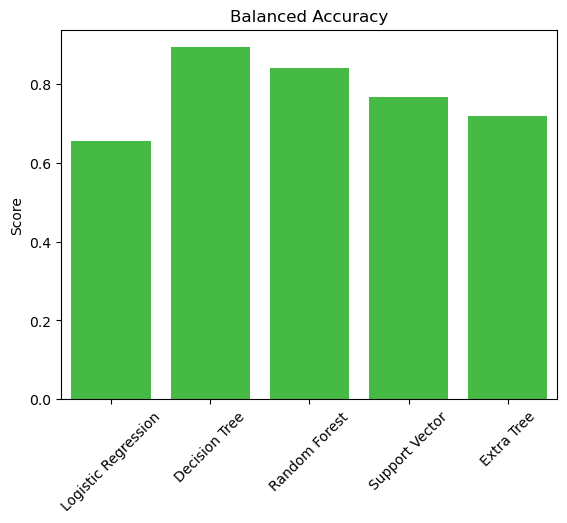

In [68]:
# plot for balanced accuracy 
ba_ax = sns.barplot(x = labels, 
                y = [balanced_accuracy_log_reg, balanced_accuracy_dtc, balanced_accuracy_rfc, balanced_accuracy_svc, balanced_accuracy_etc], 
                color = 'limegreen')
plt.title("Balanced Accuracy", fontweight = 10)
plt.ylabel("Score", fontweight = 10)
ba_ax.set_xticklabels(labels, rotation = 45)
plt.show()

### **(II) Model comparison in terms of accuracy**

/var/folders/78/vxf39k6x6dv9ygq0d0dlqsj80000gn/T/ipykernel_17912/476518515.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  acc_ax.set_xticklabels(labels, rotation = 45)


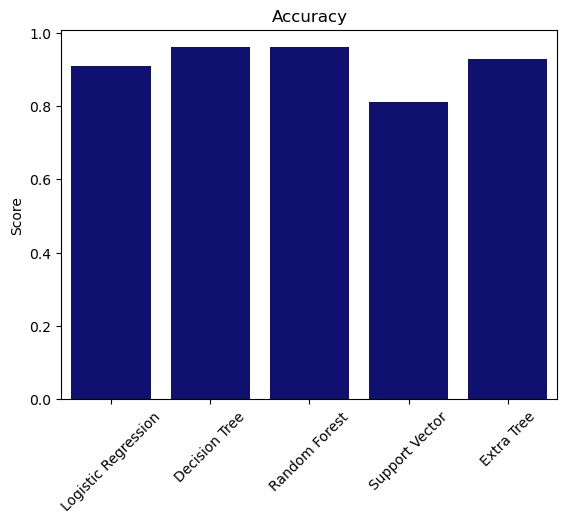

In [69]:
# plot for accuracy 
acc_ax = sns.barplot(x = labels, 
                y = [accuracy_log_reg, accuracy_dtc, accuracy_rfc, accuracy_svc, accuracy_etc], 
                color = 'navy')
plt.title("Accuracy", fontweight = 10)
plt.ylabel("Score", fontweight = 10)
acc_ax.set_xticklabels(labels, rotation = 45)
plt.show()

### **(III) Model comparison in terms of precision**

/var/folders/78/vxf39k6x6dv9ygq0d0dlqsj80000gn/T/ipykernel_17912/872730916.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pre_ax.set_xticklabels(labels, rotation = 45)


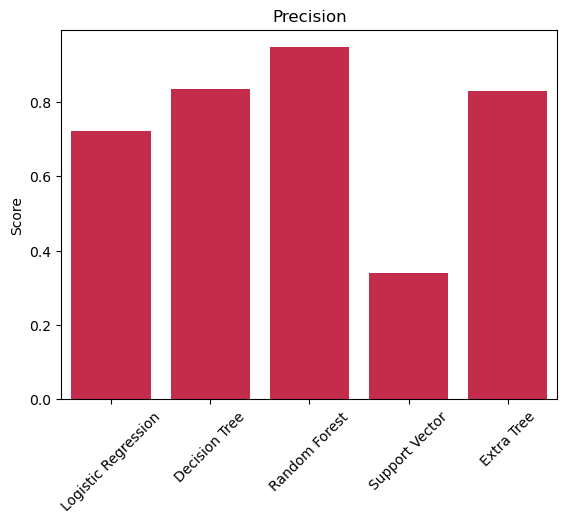

In [70]:
# plot for precision 
pre_ax = sns.barplot(x = labels, 
                y = [precision_log_reg, precision_dtc, precision_rfc, precision_svc, precision_etc], 
                color = 'crimson')
plt.title("Precision", fontweight = 10)
plt.ylabel("Score", fontweight = 10)
pre_ax.set_xticklabels(labels, rotation = 45)
plt.show()

### **(IV) Model comparison in terms of recall**

/var/folders/78/vxf39k6x6dv9ygq0d0dlqsj80000gn/T/ipykernel_17912/3483044814.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  re_ax.set_xticklabels(labels, rotation = 45)


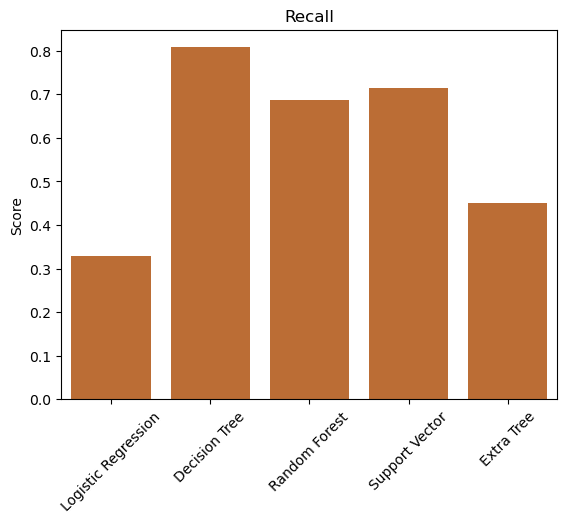

In [71]:
# plot for recall 
re_ax = sns.barplot(x = labels, 
                y = [recall_log_reg, recall_dtc, recall_rfc, recall_svc, recall_etc], 
                color = 'chocolate')
plt.title("Recall", fontweight = 10)
plt.ylabel("Score", fontweight = 10)
re_ax.set_xticklabels(labels, rotation = 45)
plt.show()

### **(V) Model comparison in terms of f1-score**

/var/folders/78/vxf39k6x6dv9ygq0d0dlqsj80000gn/T/ipykernel_17912/3842885108.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  re_ax.set_xticklabels(labels, rotation = 45)


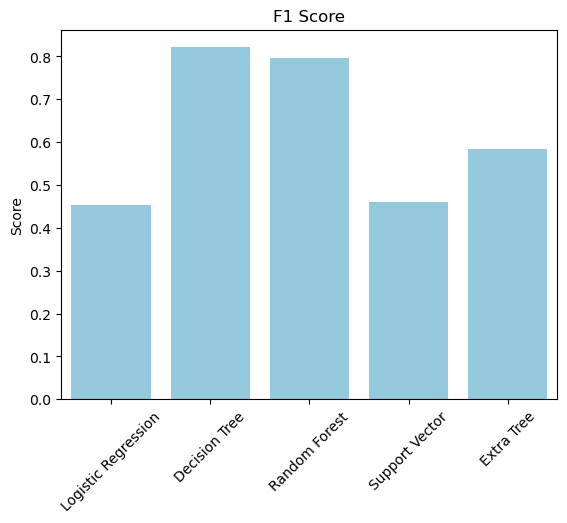

In [78]:
# plot for f1-score 
re_ax = sns.barplot(x = labels, 
                y = [f1_score_log_reg, f1_score_dtc, f1_score_rfc, f1_score_svc, f1_score_etc], 
                color = 'skyblue')
plt.title("F1 Score", fontweight = 10)
plt.ylabel("Score", fontweight = 10)
re_ax.set_xticklabels(labels, rotation = 45)
plt.show()

Tree-based models demonstrate superior performance in accuracy and F1 scores compared to linear models. For instance, Decision Trees (DT) achieved an accuracy of 0.96 and an F1 score of 0.90, while Random Forest (RF) attained the similar accuracy and F1 score. Notably, tree-based models exhibit lower overfitting on imbalanced data because they require less data for training, making even a few samples from the minority class sufficient. Conversely, linear models like Logistic Regression (LR) and Support Vector Machines (SVM) also exhibit good accuracy scores, achieving same scores of 0.91, respectively. However, their F1 scores were lower, each registering a 0.71 and 0.70, respectively. This disparity stems from linear models' need for larger datasets to train effectively, leading to a good fit for majority class data but an underfit for minority class data.

In general, the models exhibited overfitting on the majority class data, resulting in poor performance on minority class samples. This overfitting caused the accuracy score to be considerably higher than the F1 score. Notably, the models performed notably well in predicting the 'not safe' (0) class, with similar precision, recall, and F1 scores across all models. However, for the 'safe' class (1), the models showed inadequate performance due to underfitting. This was because they did not receive sufficient training samples for the 'safe' class, leading to poor performance on minority class predictions.

## **(D) Hyperparameters Tuning on Decision Tree Classifier**

Grid search cross-validation (GridSearchCV) is a technique used for hyperparameter tuning in machine learning models. It involves systematically searching through a predefined grid of hyperparameters and evaluating each combination using cross-validation to determine the best-performing set. Grid search CV is essential because it automates the process of finding the optimal hyperparameters, which are parameters that are not learned directly from the data but affect the learning process. By exhaustively searching through the hyperparameter space, grid search CV helps to identify the combination that maximizes the model's performance on unseen data, thus improving its generalization ability. This method is particularly useful when dealing with complex models with multiple hyperparameters, as it ensures that the model's hyperparameters are tuned effectively to achieve the best performance without overfitting to the training data.

In [79]:
# define a dictionary of hyperparameters to search over the Decision Tree classifier
params = {'max_depth': np.arange(5, 201)}

# define a cross-validation strategy using StratifiedKFold for classification tasks 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# initialize GridSearchCV to search over hyperparameters for Decision Tree classifier 
dtc_gs = GridSearchCV(DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'), 
                      param_grid = params, 
                      cv = cv, 
                      n_jobs = 1, 
                      verbose = 3, 
                      scoring = 'accuracy', 
                      return_train_score=True)
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END ...max_depth=5;, score=(train=0.938, test=0.919) total time=   0.0s
[CV 2/5] END ...max_depth=5;, score=(train=0.922, test=0.918) total time=   0.0s
[CV 3/5] END ...max_depth=5;, score=(train=0.880, test=0.875) total time=   0.0s
[CV 4/5] END ...max_depth=5;, score=(train=0.907, test=0.926) total time=   0.0s
[CV 5/5] END ...max_depth=5;, score=(train=0.839, test=0.832) total time=   0.0s
[CV 1/5] END ...max_depth=6;, score=(train=0.932, test=0.902) total time=   0.0s
[CV 2/5] END ...max_depth=6;, score=(train=0.915, test=0.891) total time=   0.0s
[CV 3/5] END ...max_depth=6;, score=(train=0.925, test=0.917) total time=   0.0s
[CV 4/5] END ...max_depth=6;, score=(train=0.909, test=0.914) total time=   0.0s
[CV 5/5] END ...max_depth=6;, score=(train=0.922, test=0.910) total time=   0.0s
[CV 1/5] END ...max_depth=7;, score=(train=0.949, test=0.927) total time=   0.0s
[CV 2/5] END ...max_depth=7;, score=(train=0.9

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=1,
             param_grid={'max_depth': array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,...
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200])},
             return_train_score=True, scoring='accuracy', verbose=3)

In [80]:
# print the best estimators for the best hyperparameters of Decision Tree classifier 
print("Best Estimators: " + str(dtc_gs.best_estimator_))
# print the best scorer for the best hyperparameters of Decision Tree classifier
print("Best Score: " + str(dtc_gs.best_score_))

Best Estimators: DecisionTreeClassifier(class_weight='balanced', max_depth=26, random_state=42)
Best Score: 0.9577869673573105


## **(E) Evaluate the Hyperparameters Tuning on Decision Tree Classifier**

Evaluating the Grid Search CV of hyperparameter tuning model using test data is crucial to assess the model's performance on unseen data and estimate how well it generalizes to new observations. When training machine learning models, the goal is not only to achieve high performance on the training data but also to ensure that the model can make accurate predictions on new, unseen data. By using a separate test dataset that the model has not been exposed to during training or hyperparameter tuning, we can obtain an unbiased estimate of the model's performance. This helps to detect any overfitting issues that may have occurred during the tuning process and provides a more realistic assessment of how well the model is likely to perform in real-world scenarios. Additionally, evaluating the model on test data allows us to make informed decisions about its deployment and helps to instill confidence in its predictive capabilities.

In [81]:
# make predictions on the test data
y_pred_dtc_gs = dtc_gs.predict(X_test)
# print the classification report to evaluate the model performance
print(classification_report(y_test, y_pred_dtc_gs, target_names = ['Not Safe', 'Safe']))

              precision    recall  f1-score   support

    Not Safe       0.98      0.98      0.98      1418
        Safe       0.82      0.81      0.81       182

    accuracy                           0.96      1600
   macro avg       0.90      0.89      0.89      1600
weighted avg       0.96      0.96      0.96      1600



The classification results indicate a high level of performance overall. 

For the "Not Safe" class, precision, recall, and F1-score are all high, at 0.98, suggesting that the model effectively identifies instances belonging to this class with few false positives and negatives. 

Similarly, for the "Safe" class, precision, recall, and F1-score are slightly lower but still respectable, at 0.84, indicating that while the model identifies instances of this class with good accuracy, there are some false positives and negatives. The accuracy of 0.96 reflects the overall proportion of correctly classified instances in the dataset. The macro and weighted averages of precision, recall, and F1-score are both high, indicating a balanced performance across classes. 

Overall, the model demonstrates strong predictive capabilities with a weighted average F1-score of 0.96, suggesting its suitability for classification tasks.

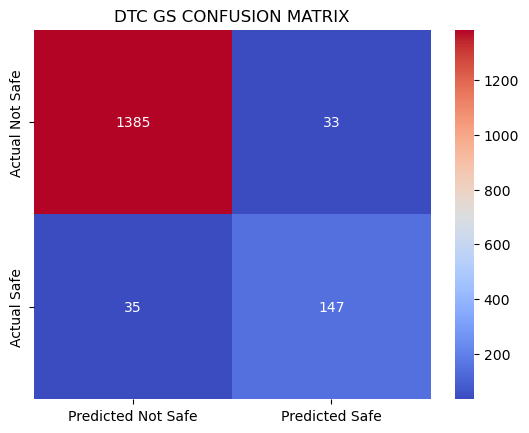

In [82]:
# calculate the confusion matrix
conf_mat_dtc_gs = confusion_matrix(y_test, y_pred_dtc_gs)
# create a DataFrame to display the confusion matrix
conf_mat_dtc_gs_plot = pd.DataFrame(data = conf_mat_dtc_gs, index = ['Actual Not Safe', 'Actual Safe'], columns = ['Predicted Not Safe', 'Predicted Safe'])
# plot the confusion matrix heatmap with annotations
sns.heatmap(conf_mat_dtc_gs_plot, annot = True, cmap = 'coolwarm', fmt = 'g')
# set title for the confusion matrix plot
plt.title("DTC GS CONFUSION MATRIX")
# display the plot
plt.show()

The top-left cell (1385) indicates the number of instances that were correctly classified as belonging to the "Not Safe" class (True Negatives).

The top-right cell (33) indicates the number of instances that were incorrectly classified as "Safe" when they actually belonged to the "Not Safe" class (False Positives).

The bottom-left cell (35) indicates the number of instances that were incorrectly classified as "Not Safe" when they actually belonged to the "Safe" class (False Negatives).

The bottom-right cell (147) indicates the number of instances that were correctly classified as belonging to the "Safe" class (True Positives).

From this confusion matrix, we can see that the model performs well overall, with a high number of true positives and true negatives. 

However, there are some misclassifications, as indicated by the false positives and false negatives. Overall, the model appears to have a higher accuracy in predicting the "Not Safe" class compared to the "Safe" class, as there are fewer false positives and more true negatives.

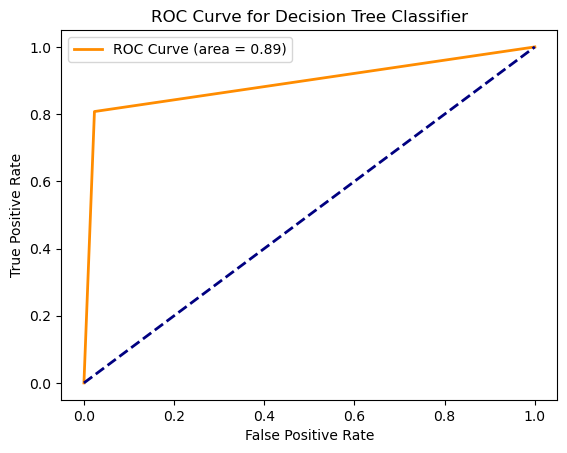

In [83]:
# compute the ROC curve and calculate the area under the curve
fpr_dtc_gs, tpr_dtc_gs, thresholds = roc_curve(y_test, y_pred_dtc_gs)
roc_auc = auc(fpr_dtc_gs, tpr_dtc_gs)

# plot the ROC curve 
plt.plot(fpr_dtc_gs, tpr_dtc_gs, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.title("ROC Curve for Decision Tree Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

A higher AUC value (closer to 1) suggests better discrimination between the positive and negative classes, indicating that the model can effectively distinguish between them. 

With an AUC of 0.90, the model shows a high probability of ranking a randomly chosen positive instance higher than a randomly chosen negative instance. In practical terms, this means that the model has a high chance of correctly classifying instances across a range of decision thresholds, making it reliable for binary classification tasks.

## **(F) Feature Importances on Optimized Decision Tree Classifier**

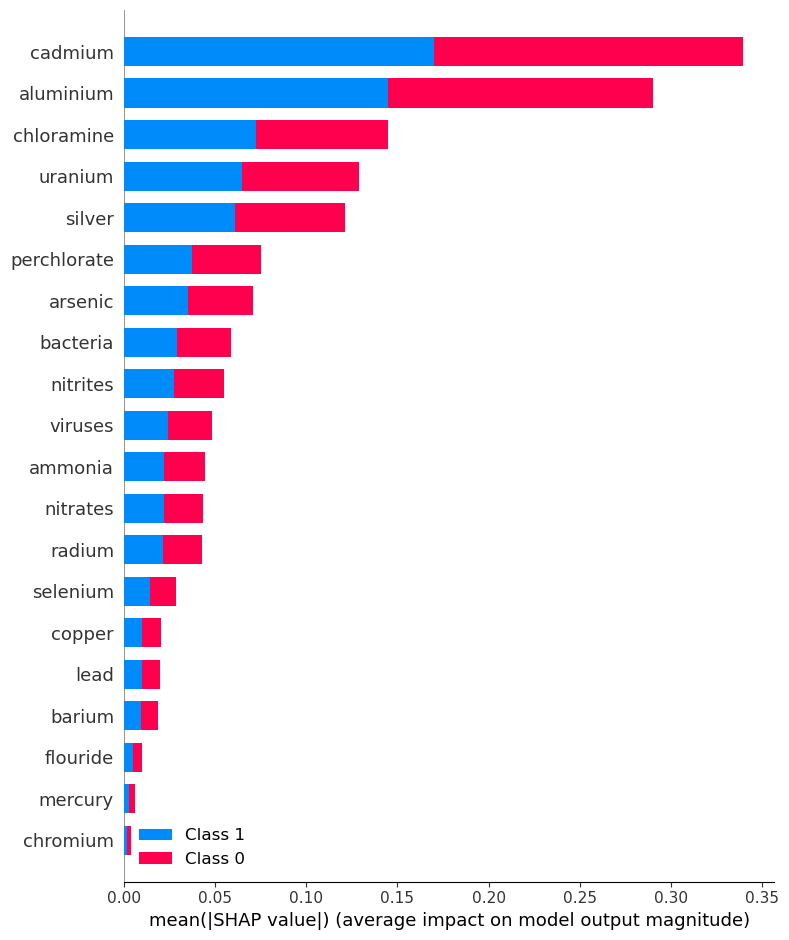

In [93]:
explainer = shap.TreeExplainer(dtc_gs.best_estimator_)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

Based on the information provided above, it seems that cadmium, aluminium, chloramine, uranium, and silver have the highest average SHAP values in a model predicting water quality. This suggests that these features are the influential in determining whether the water is classified as safe or not safe. 

- Cadmium, Uranium: These elements are known to be highly toxic and can cause severe health problems even at low levels. Their high SHAP values suggest they strongly influence the model's prediction of unsafe water.

- Aluminium: While aluminium can be harmful at high concentrations, it's often present in treated water at regulated levels. The model might be sensitive to aluminium levels, but further analysis is needed to determine its impact on the "safe" classification.

- Chlroamine: This disinfectant is commonly used in water treatment. Its SHAP value could indicate that the model considers chlroamine presence as a positive factor for water safety, but it's essential to ensure proper levels are maintained to avoid harmful byproducts.

- Silver: Colloidal silver is sometimes used for water purification, but its effectiveness and safety are debated. A high SHAP value for silver might require further investigation into the model's training data and assumptions.

SHAP values are for feature importance, not absolute safety. Just because a feature has high SHAP value does not mean it is sole determinant of safety. Other factors and interactions might also play a role. 

## **(G) Save the Optimized Decision Tree Classifier Model**

In [ ]:
# save the best estimator obtained from Grid Search CV into a pickle file 
with open('best_decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dtc_gs, f)

### **Further Discussions**

This isn't just about our research; it's about making clean water a reality!  Our models show promise for real-time water quality monitoring, which could be a major breakthrough in safeguarding drinking water. Imagine being able to instantly identify risky water sources! This could revolutionize public health, especially in areas with unpredictable water quality. By using these machine learning tools, authorities can effectively monitor water, identify problems quickly, and take action to protect people's health.

### **Limitation**

While our study shows promise, it's important to acknowledge some limitations. We used historical data, which might not reflect the ever-changing nature of water quality. Additionally, we relied on standard safety thresholds that may not apply everywhere due to local factors like geography and environment.

Moving forward, incorporating real-time data and considering regional variations would strengthen our approach. Overall, this research highlights the potential of machine learning for water quality assessment. By making the results understandable, identifying key factors, and demonstrating practical applications, we emphasize the value of automated systems in safeguarding clean drinking water.

The limitations identified here serve as a guide for future research, paving the way for continuous improvement in water quality management and global public health.

### **Future Scope**

1. The next step is to make our water quality assessments even more dynamic. Imagine incorporating live data feeds from sensors and other sources directly into our machine learning models. This constant flow of information would allow the models to learn and adapt in real-time, becoming more adept at spotting water quality issues the moment they arise. By ditching the reliance solely on historical data, we can achieve faster and more precise interventions, safeguarding public health more effectively.

2. Investigate the potential of using powerful AI methods, like convolutional neural networks and recurrent neural networks, to unlock insights from intricate water quality data that has many variables.

3. Let's build AI tools that explain their reasoning! This will help people who manage water quality trust the decisions these models make. Tools like LIME and SHAP can shed light on how these models arrive at their predictions, making them more transparent and reliable.